##Sales Data Analysis

A company has shared their Diwali sales data to anaylse their sales for the following objectives
* Enhance Customer Experience: By analyzing sales data, the company seeks to understand customer preferences and behaviors better. This insight will help them tailor their offerings and services to improve overall customer satisfaction.

* Increase Revenue: Through analysis of sales data, the company aims to identify opportunities for revenue growth. By optimizing product offerings, pricing strategies, and marketing efforts, they seek to maximize sales revenue during the Diwali season and beyond.

###Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###Importing data

In [2]:
df = pd.read_csv('/content/Diwali Sales Data.csv', encoding='unicode_escape')

###Reading data

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [ ]:
df.shape

(11251, 15)

In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [ ]:
df.duplicated().sum()

8

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

###Data cleaning

In [ ]:
df.drop(columns=['Status', 'unnamed1'], inplace=True)

In [ ]:
df.dropna(inplace= True)

In [ ]:
df['Amount'] = df['Amount'].astype('int')

<Axes: xlabel='Gender', ylabel='count'>

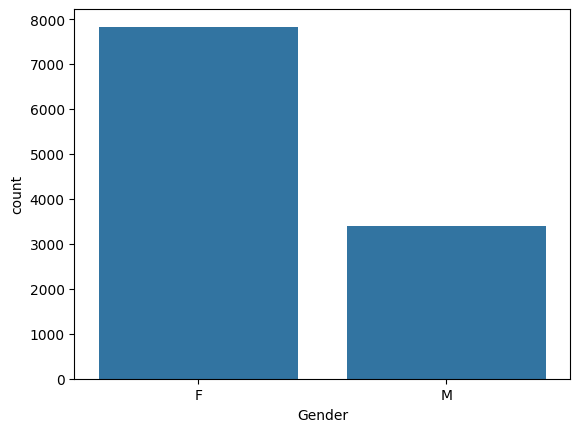

In [ ]:
sns.countplot(x = 'Gender', data=df)

1] From the above graphs we can see that most of the buyers are females.

<Axes: xlabel='Age Group', ylabel='count'>

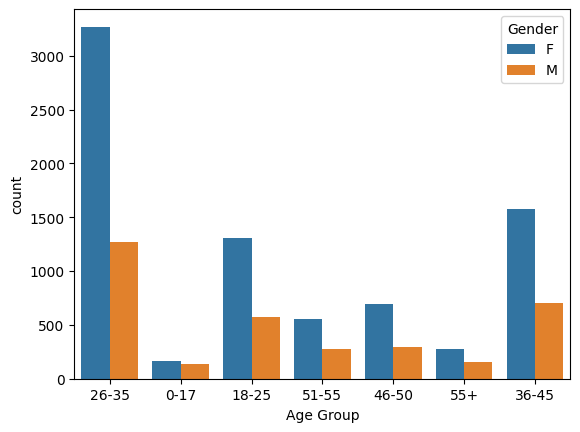

In [ ]:
sns.countplot(x= 'Age Group', hue='Gender', data=df)

2] The above graph states that most of the buyers are from 26-35 age group and the least buyers are from age group 0-17

Text(0.5, 1.0, 'Sales from Top 10 States')

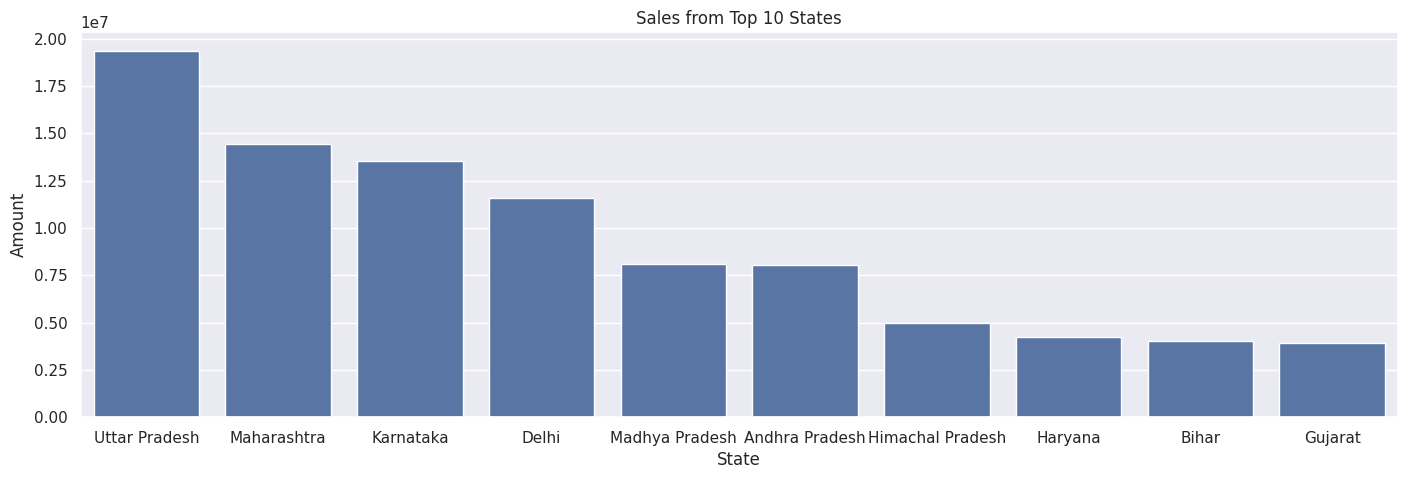

In [ ]:
state = df.groupby(['State'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)
sns.barplot(x="State", y="Amount", data=state)
sns.set(rc={'figure.figsize': (18,6)})
plt.title('Sales from Top 10 States')

3] From the graph we can see that most orders are from Uttar Pradesh followed by Maharashtra and Karnataka

Text(0.5, 1.0, 'Marital_Status')

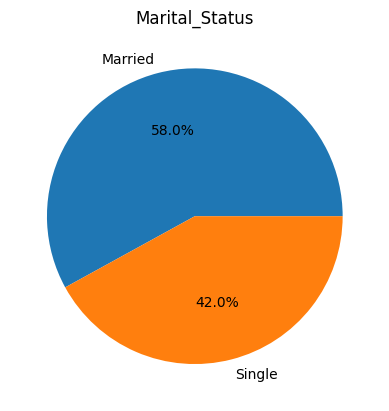

In [ ]:
sizes = df['Marital_Status'].value_counts().values
labels = ['Married', 'Single']
plt.pie(sizes, labels= labels, autopct= '%1.1F%%')
plt.title('Marital_Status')

3.a] This graph shows that 58% of the population is married and 42% are single

<Axes: xlabel='Marital_Status', ylabel='Amount'>

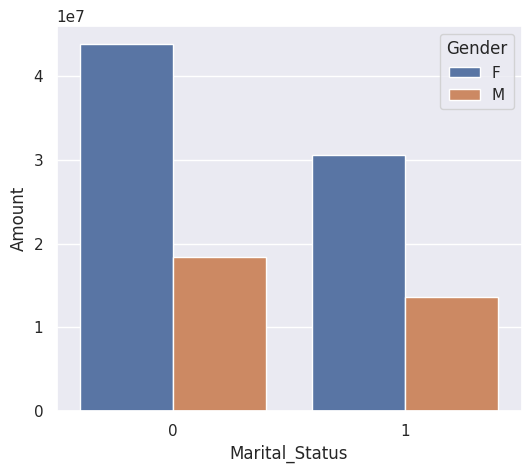

In [ ]:
sales = df.groupby(['Marital_Status', 'Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False)
sns.set(rc={'figure.figsize': (6,5)})
sns.barplot(x="Marital_Status", y="Amount", hue='Gender', data=sales)

3.b] This graph exhibits that married women purchase the most

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Healthcare'),
  Text(1, 0, 'Govt'),
  Text(2, 0, 'Automobile'),
  Text(3, 0, 'Construction'),
  Text(4, 0, 'Food Processing'),
  Text(5, 0, 'Lawyer'),
  Text(6, 0, 'Media'),
  Text(7, 0, 'Banking'),
  Text(8, 0, 'Retail'),
  Text(9, 0, 'IT Sector'),
  Text(10, 0, 'Aviation'),
  Text(11, 0, 'Hospitality'),
  Text(12, 0, 'Agriculture'),
  Text(13, 0, 'Textile'),
  Text(14, 0, 'Chemical')])

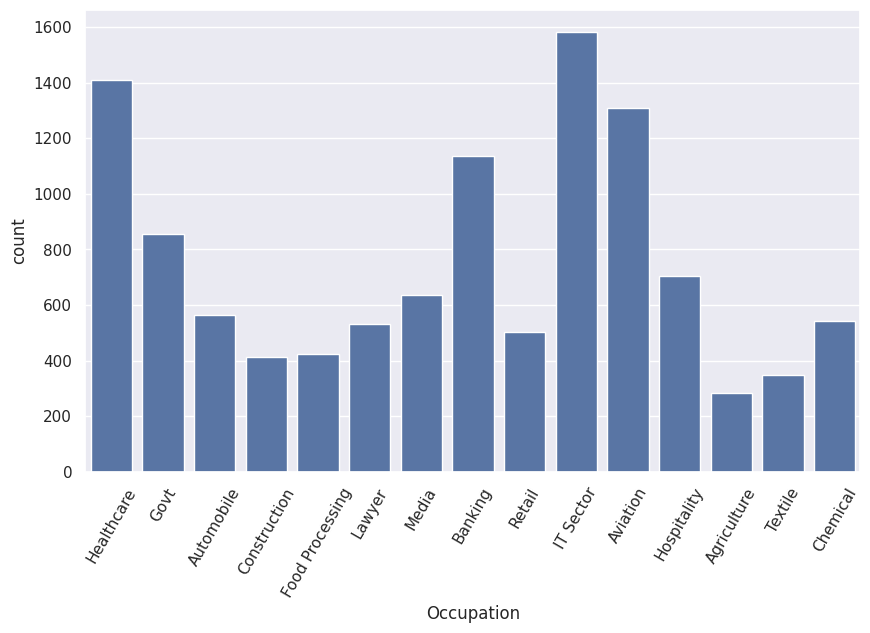

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'Occupation', data=df)
plt.xticks(rotation=60)

4] The graph illustrates that individuals working in the IT sector make the highest number of purchases, followed by those in the Healthcare and Aviation sectors.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Auto'),
  Text(1, 0, 'Hand & Power Tools'),
  Text(2, 0, 'Stationery'),
  Text(3, 0, 'Tupperware'),
  Text(4, 0, 'Footwear & Shoes'),
  Text(5, 0, 'Furniture'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Games & Toys'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Electronics & Gadgets'),
  Text(11, 0, 'Decor'),
  Text(12, 0, 'Clothing & Apparel'),
  Text(13, 0, 'Beauty'),
  Text(14, 0, 'Household items'),
  Text(15, 0, 'Pet Care'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

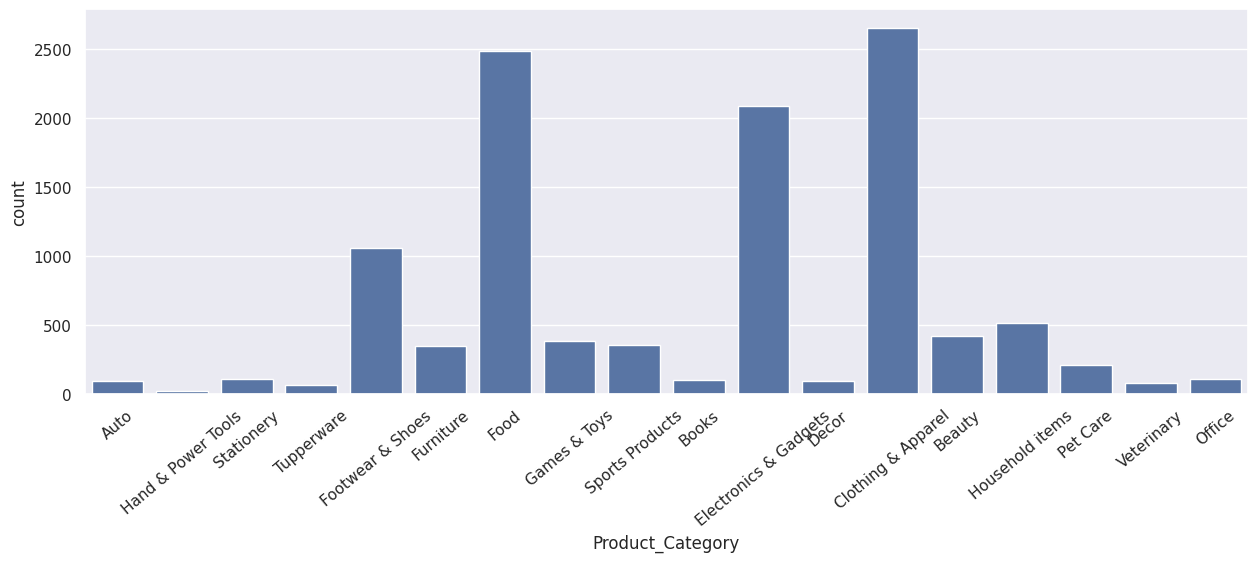

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Product_Category', data=df)
plt.xticks(rotation=40)

5] The visual representation indicates that the highest expenditure was on clothing, with electronics ranking second and food in third place.

###Conclusion

Married women between 26 and 35 years old from Uttar Pradesh, Maharashtra, and Karnataka, working in IT, healthcare, and aviation sectors, tend to spend more on clothes, food, and electronics. These preferences reflect their lifestyle choices and needs, showing that these sectors play a significant role in their spending habits. This suggests potential business opportunities for companies targeting this demographic and industry segments.


